In [127]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [128]:
#Create a function to save on code
def getfilelistDF(location):
    allscripts = os.listdir(location)
    allscripts
    filename = ''
    dfscript = pd.DataFrame(columns = ['Label', 'Text', 'filename'])

    for script in allscripts:
        if script[-4:] == '.txt':
            filename = script
            raw_text = open(location + filename, 'r', encoding='utf-8').read()
            #raw_text = raw_text.lower()
            dfscript = dfscript.append({'Label':filename[0:4], 'Text':raw_text, 'filename':filename}, ignore_index=True)
    return dfscript

In [129]:
#Load in all our scripts
dfscript = getfilelistDF("./BuffyScripts/")

In [130]:
dfscript.head()

,Label,Text,filename
0,1x01,F.D. » Transcripts » TV & Movie Transcripts » ...,1x01 Welcome to the Hellmouth.txt
1,1x02,F.D. » Transcripts » TV & Movie Transcripts » ...,1x02 The Harvest.txt
2,1x03,F.D. » Transcripts » TV & Movie Transcripts » ...,1x03 Witch.txt
3,1x04,F.D. » Transcripts » TV & Movie Transcripts » ...,1x04 Teacher's Pet.txt
4,1x05,F.D. » Transcripts » TV & Movie Transcripts » ...,1x05 Never Kill A Boy on the First Date.txt


In [131]:
#Load in the labels file
dfLabels = pd.read_csv('BuffyRating.csv', encoding='utf-8')

In [132]:
#Join the two files together
pdScriptLabel = pd.DataFrame(dfscript.join(dfLabels, lsuffix='Label', rsuffix='Episodeformat'))[:][["Text","Rating"]]

In [133]:
pdScriptLabel.head()

,Text,Rating
0,F.D. » Transcripts » TV & Movie Transcripts » ...,8.2
1,F.D. » Transcripts » TV & Movie Transcripts » ...,8.0
2,F.D. » Transcripts » TV & Movie Transcripts » ...,7.8
3,F.D. » Transcripts » TV & Movie Transcripts » ...,7.0
4,F.D. » Transcripts » TV & Movie Transcripts » ...,7.5


In [134]:
pdScriptLabel.dtypes

Text       object
Rating    float64
dtype: object

In [135]:
%%time
#Neural Network regression
#We should have split into text and train as the model may be overfitted
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MLPRegressor())])

text_clf = text_clf.fit(pdScriptLabel['Text'], pdScriptLabel['Rating'])

predicted = text_clf.predict(pdScriptLabel['Text'])


actual = pdScriptLabel['Rating']
predicted = text_clf.predict(pdScriptLabel['Text'])

rms = mean_squared_error(actual, predicted, squared=True)
r2 = r2_score(actual, predicted)

print("r2 = " + str(r2))
print("mean_squared_error = " + str(rms))


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


r2 = 0.7341711762998031
mean_squared_error = 0.1595515214541195
CPU times: user 22.9 s, sys: 40.1 ms, total: 23 s
Wall time: 23.2 s


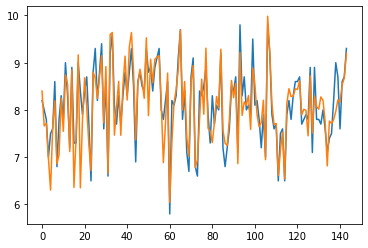

In [136]:
plt.plot(actual)
plt.plot(predicted)

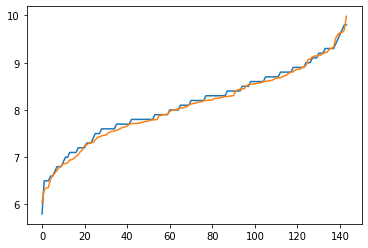

In [137]:
plt.plot(pd.DataFrame(actual).sort_values("Rating").values)
plt.plot(pd.DataFrame(predicted).sort_values(0).values)

In [138]:
newscript = "cut to the library. buffy is walking in. \
buffy: (dumbfounded) oh, god. \
giles: (os) oh, god. \
willow: (os) uh, buffy, you need to get up. \
buffy: i'm off. \
giles: (os) right. well, not till then. \
buffy: (os) right. it's okay. (to giles) um, i'm getting up. \
giles: (os) that's all. \
buffy: well, i'm going with you. \
giles: you're not going to get up till then. \
buffy: well, i'm sure you're not going to, you know, push yourself to... (gets up) i'm not going to, um, take on any more responsibility or responsibility to be more responsible. (gets up and leaves) \
giles: (os) oh, god. \
buffy: (os) i don't care. \
giles: i'm sorry. i don't understand. \
buffy: (to willow) i don't even understand. \
giles: (os) okay, i just... (stops and looks at her) i'm not making up my mind. \
buffy: (os) no. i'm just trying to stay focused. \
giles: (os) that's it."


dfNEWscript = pd.DataFrame(columns = ['Text','Rating'])

dfNEWscript = dfNEWscript.append({'Text':newscript, 'Rating':0}, ignore_index=True)

result = text_clf.predict(dfNEWscript['Text'])

print("Our new script will get a rating of " + str(result[0]))

Our new script will get a rating of 2.767485962460444
